# Introduction

We are interested in the following data based on these files:

### loc/comparison

- LOC diff per project
- files diff per project

### summary_lang_specific

- FN per project
- FP per project
- Detection% per project
- Deviation% per project

### rules_summary

This contains every single rule, even the ones with 0 FPs/FNs.

- FN per rule
- FP per rule
- Detection% per rule
- Deviation% per rule

### noisy_rules

This contains only rules that have at least 1 FP/FN.

- FN per rule
- FP per rule

In [17]:
# DEFINITIONS

BASE_PATH = "../output/"
DELIMITER = ";"
LANGUAGE_MONIKER = "csharpsquid:" # this is used to remove the prefix for sonar rules on the pie charts.

PLOT_W = 40
PLOT_H = 10

PIE_W = 20
PIE_H = 10

PADDING = 5 # padding between bars for double-bar plots
WIDTH = 0.4 # width of bars for double-bar plots
HOW_MANY_RULES = 30 # how many noisy rules to include in the pie chart

In [25]:
# BASE

import matplotlib.pyplot as plt
import numpy as np


def print_formatted(key, value):
    print('{:10s} {:.2f}'.format(key+":", value))


def pretty_print_aggregate_metrics(sequence, title = ""):
    mean = np.mean(sequence)
    median = np.median(sequence)
    variance = np.var(sequence)
    standard_deviation = np.std(sequence)

    print(title)
    print("="*len(title))
    print_formatted("Mean", mean)
    print_formatted("Median", median)
    print_formatted("Variance", variance)
    print_formatted("STD", standard_deviation)

def sort_zipped_single(labels, values):
    zipped = zip(labels,values)
    s = sorted(zipped, key=lambda x:x[1])
    return tuple(zip(*s))

def sort_zipped_double(labels, left, right, comparer):
    zipped = zip(labels,left,right)
    s = sorted(zipped, key=comparer)
    return tuple(zip(*s))

def generate_grouped_bars_sort_by_diff(labels, values1, values2, label1, label2, ylabel="", title =""):
    comparer = lambda x:abs(x[1]-x[2])
    generate_grouped_bars(labels, values1, values2, label1, label2, comparer, ylabel, title)

def generate_grouped_bars_sort_by_sum(labels, values1, values2, label1, label2, ylabel="", title =""):
    comparer = lambda x:x[1]+x[2]
    generate_grouped_bars(labels, values1, values2, label1, label2, comparer, ylabel, title)

def generate_grouped_bars(labels, values1, values2, label1, label2, comparer, ylabel="", title =""):
    x = np.arange(len(labels))  # the label locations

    labels,values1,values2 = sort_zipped_double(labels,values1, values2, comparer)

    fig, ax = plt.subplots()
    fig.set_size_inches(PLOT_W, PLOT_H)
    rects1 = ax.bar(x - WIDTH/2, values1, WIDTH, label=label1)
    rects2 = ax.bar(x + WIDTH/2, values2, WIDTH, label=label2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=PADDING)
    ax.bar_label(rects2, padding=PADDING)

    fig.tight_layout()

    plt.show()

def generate_single_bars(labels, values, ylabel="", title =""):
    fig, ax = plt.subplots()
    fig.set_size_inches(PLOT_W, PLOT_H)

    labels, values = sort_zipped_single(labels, values)
    
    ax.bar(labels, values)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    plt.show()

def generate_pie_chart(labels, values, title=""):
    fig, ax = plt.subplots()
    fig.set_size_inches(PIE_W, PIE_H)

    ax.pie(values,startangle=90)

    # Adding legend
    ax.legend(labels, title=title)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

### Lines of code before vs after per project

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

path = BASE_PATH + "loc/comparison"

with open(path, "rt") as f:
    lines = f.readlines()

splitted = [l.split(DELIMITER) for l in lines[1:]]
labels = [l[0] for l in splitted]
loc_before = [int(l[1]) for l in splitted]
loc_after = [int(l[2]) for l in splitted]

generate_grouped_bars_sort_by_diff(
    labels, loc_before, loc_after, "Before", "After","Lines of Code", "LOCs before and after")

### Files before and after per project

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

path = BASE_PATH + "loc/comparison"

with open(path, "rt") as f:
    lines = f.readlines()

splitted = [l.split(DELIMITER) for l in lines[1:]]
labels = [l[0] for l in splitted]

added_before = [int(l[4]) for l in splitted]
added_after = [int(l[3]) for l in splitted]

generate_grouped_bars_sort_by_diff(
    labels, added_before, added_after, "Only before", "Only after","Different files", "Files diff per project")

### FN/FP per project

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

path = BASE_PATH + "summary_lang_specific"

def get_valid_lines(lines):
    valid = []
    for l in lines[3:]:
        if l.startswith("======"):
            return valid
        else:
            valid.append(l)

with open(path, "rt") as f:
    lines = f.readlines()
    lines = get_valid_lines(lines)

splitted = [l.split(DELIMITER) for l in lines]
labels = [l[0] for l in splitted]

fns = [int(l[2]) for l in splitted]
fps= [int(l[4]) for l in splitted]

generate_grouped_bars_sort_by_sum(
    labels, fns, fps, "FNs", "FPs","FN/FP", "FN/FP per project")

### Detection% per project

Detection - bigger is better [(before - FN) / before * 100]
Mean:      nan
Median:    nan
Variance:  nan
STD:       nan


C:\Users\alexander.meseldzija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\alexander.meseldzija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\alexander.meseldzija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alexander.meseldzija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312

ValueError: not enough values to unpack (expected 2, got 0)

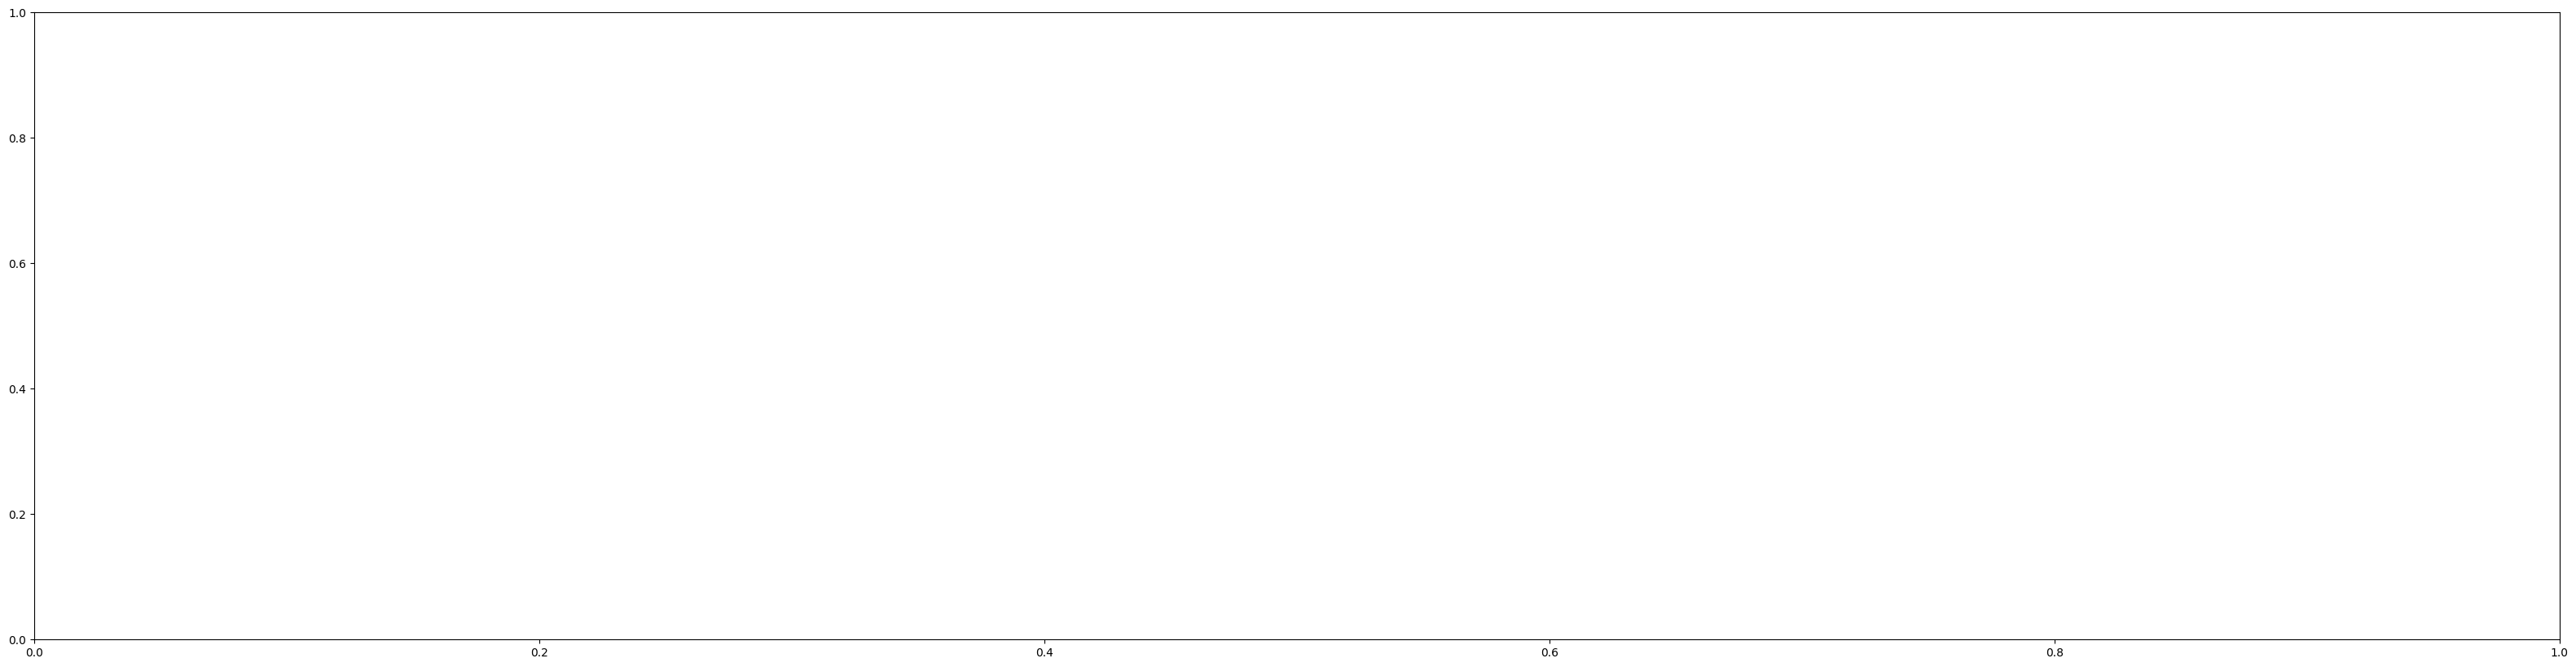

In [35]:
import matplotlib.pyplot as plt


path = BASE_PATH + "summary_lang_specific"

def get_valid_lines(lines):
    valid = []
    for l in lines[3:]:
        if l.startswith("======"):
            return valid
        else:
            valid.append(l)

with open(path, "rt") as f:
    lines = f.readlines()
    lines = get_valid_lines(lines)

splitted = [l.split(DELIMITER) for l in lines]
labels = [l[0] for l in splitted]
detections = [float(l[3].replace(",",".")) for l in splitted if l[3] != 'NaN']
detection_title = "Detection - bigger is better [(before - FN) / before * 100]"
pretty_print_aggregate_metrics(detections, detection_title)

generate_single_bars(labels, detections, ylabel="Detection%", title="Detection% per project")


### Deviation% per project

In [ ]:
import matplotlib.pyplot as plt

path = BASE_PATH + "summary_lang_specific"

def get_valid_lines(lines):
    valid = []
    for l in lines[3:]:
        if l.startswith("======"):
            return valid
        else:
            valid.append(l)

with open(path, "rt") as f:
    lines = f.readlines()
    lines = get_valid_lines(lines)

splitted = [l.split(DELIMITER) for l in lines]
labels = [l[0] for l in splitted]
deviations = [float(l[5].replace(",",".")) for l in splitted]

deviation_title = "Deviation (smaller is better) [FP / before * 100]"
pretty_print_aggregate_metrics(deviations, deviation_title)

generate_single_bars(labels, deviations, ylabel="Deviation%", title="Deviation% per project")

### Noisy FP/FNs per rule

In [ ]:
import matplotlib.pyplot as plt

path = BASE_PATH + "noisy_rules"

def parse(line):
    fixed = line.replace(" ", "").replace("\n","").replace(LANGUAGE_MONIKER, "")
    amount = fixed.split("=")[1]
    return (fixed, int(amount))
    
def partition(lst):
    threshold_generator = (idx for idx,v in enumerate(lst) if v == "\n")
    end1 = next(threshold_generator)
    return (lst[2:end1], lst[end1+2:])

def get_fn_fp_lines(lines):
    fns, fps = partition(lines)
    fns = list(map(parse, fns))[:HOW_MANY_RULES]
    fps = list(map(parse, fps))[:HOW_MANY_RULES]
    return fns, fps


with open(path, "rt") as f:
    lines = f.readlines()
    fns,fps = get_fn_fp_lines(lines)

labels, values = zip(*fns)
generate_pie_chart(labels, values, "FNs")

labels, values = zip(*fps)
generate_pie_chart(labels, values, "FPs")